# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Day 2 APIs, Activity 5 for reference

url= f"http://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid={weather_api_key}"
units = "imperial"


#Build partial query URl
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(url)
weather =response.json()

pprint(weather)
#response.text


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 35, 'lon': 139},
 'dt': 1587432790,
 'id': 1851632,
 'main': {'feels_like': 292.13,
          'humidity': 55,
          'pressure': 1007,
          'temp': 293.15,
          'temp_max': 293.15,
          'temp_min': 293.15},
 'name': 'Shuzenji',
 'sys': {'country': 'JP',
         'id': 2003105,
         'sunrise': 1587413065,
         'sunset': 1587460836,
         'type': 3},
 'timezone': 32400,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'gust': 1.79, 'speed': 1.79}}


In [4]:
#Day 2 APIs, Activity 5  and Activity 8 for reference

number = 0 

#Set up lists to hold response info
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []

for city in cities: 
    try:
        response = requests.get(url + '&q=' + city).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp']-273)
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        print(f"Success {city}")
    except:
        print(f"Unknown Data for:{city}")
        number = number + 1
        
        
print(response)
print(city_name)
print(temp)
print(humidity)
print(cloudiness)
print(wind_speed)
print(lat)
print(lng)
print(len(city_name))
print(len(cities))



Success hami
Success ponta do sol
Success albany
Success tuktoyaktuk
Unknown Data for:tumannyy
Success ushuaia
Success saint george
Success rikitea
Unknown Data for:taolanaro
Success hobart
Unknown Data for:lolua
Success son la
Success bemidji
Success kruisfontein
Success marsa matruh
Success hithadhoo
Success faya
Success poronaysk
Success collie
Success butaritari
Success bredasdorp
Success rocha
Unknown Data for:barentsburg
Success dikson
Success fillmore
Success flinders
Success castro
Success dayong
Success barquisimeto
Success santo amaro das brotas
Success vanavara
Success puerto ayora
Success busselton
Unknown Data for:mys shmidta
Success sitka
Success naryan-mar
Unknown Data for:zlatoustovsk
Success nanortalik
Success longyearbyen
Success noumea
Success port hardy
Success airai
Success sambava
Success port elizabeth
Unknown Data for:grand river south east
Success smolenka
Unknown Data for:zhanatas
Success new norfolk
Success iqaluit
Success sao filipe
Success ribeira grande
Su

Success zelenoborskiy
Success taraz
Success comodoro rivadavia
Success sal rei
Success baculin
Success ulladulla
Success makuyuni
Success roma
Unknown Data for:sorvag
Success pershotravneve
Success mutis
Success baracoa
Success ikom
Success mayo
Success owando
Success vao
Success cadereyta
Success aksu
Success cap-aux-meules
Success bubaque
Success elizabeth city
Success san rafael
Unknown Data for:yuzhno-yeniseyskiy
Success maragogi
Success sale
Success filadelfia
Unknown Data for:saleaula
Unknown Data for:marcona
Success tari
Success talakan
Success lagoa
Success teya
Success talcher
Unknown Data for:wazzan
Success natal
Success irbil
Success churhat
Success clyde river
Success mikhaylovka
Success hede
Success gamba
Success mount pleasant
Success strezhevoy
Success meulaboh
Unknown Data for:ijaki
Success gimbi
Success lorengau
Success nome
Success oulainen
Success burdur
Success anloga
Success taitung
Success severnoye
Success koslan
Success ananas
Success coihaique
Success sao joao 

537
590


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Day 2 APIs, Activity 5 for reference

#Create Data Frame
response_df= pd. DataFrame({
        'City':city_name,
        'Temperature': temp,
        'Humidity': humidity,
        'Cloudiness': cloudiness,
        'Wind Speed': wind_speed,
        'Latitude': lat,
        'Longitude': lng})

response_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Kumul,19.42,14,24,2.45,42.80,93.45
1,Ponta do Sol,14.93,59,20,2.10,32.67,-17.10
2,Albany,4.11,39,1,1.50,42.60,-73.97
3,Tuktoyaktuk,-12.85,84,90,5.70,69.45,-133.04
4,Ushuaia,6.15,75,75,19.00,-54.80,-68.30


In [6]:
#Export the city data into a .csv. 
pd.DataFrame.to_csv(response_df, 'response.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
response_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Kumul,19.42,14,24,2.45,42.80,93.45
1,Ponta do Sol,14.93,59,20,2.10,32.67,-17.10
2,Albany,4.11,39,1,1.50,42.60,-73.97
3,Tuktoyaktuk,-12.85,84,90,5.70,69.45,-133.04
4,Ushuaia,6.15,75,75,19.00,-54.80,-68.30


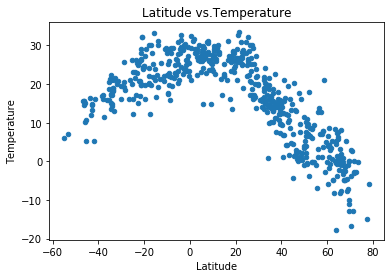

<Figure size 432x288 with 0 Axes>

In [8]:
#plt.scatter(response_df["Latitude"], response_df['Temperature'],marker='o')
#plt.show()

response_df.plot(kind = "scatter", x="Latitude", y="Temperature", title="Latitude vs.Temperature")
plt.show()

plt.savefig("lat_temp_plot.png", bbox_inches='tight', dpi=600)

In [ ]:
#As distance from the equator increases (either north or south), tempteratures decrease as well.
#This graph shows that temperatures peak at the equator.

#### Latitude vs. Humidity Plot

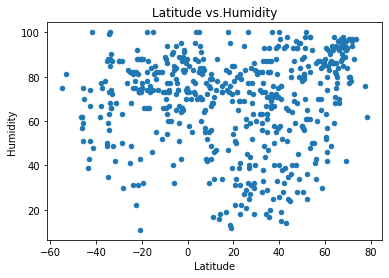

<Figure size 432x288 with 0 Axes>

In [9]:
#plt.scatter(response_df["Latitude"], response_df['Humidity'],marker='o')
#plt.show()

response_df.plot(kind = "scatter", x="Latitude", y="Humidity", title="Latitude vs.Humidity")
plt.show()

plt.savefig("lat_temp_plot.png", bbox_inches='tight', dpi=600)

In [10]:
#Humidity looks consistent regardless of the point of latitude.  

#### Latitude vs. Cloudiness Plot

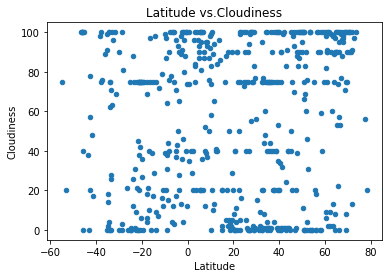

<Figure size 432x288 with 0 Axes>

In [11]:
response_df.plot(kind = "scatter", x="Latitude", y="Cloudiness", title="Latitude vs.Cloudiness")
plt.show()

plt.savefig("lat_temp_plot.png", bbox_inches='tight', dpi=600)

In [12]:
#There doesn't seem to be a correlation between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

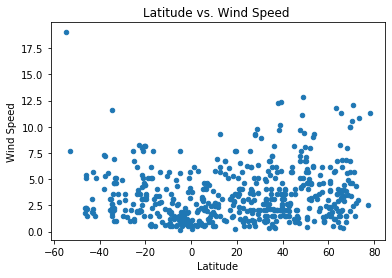

<Figure size 432x288 with 0 Axes>

In [13]:
response_df.plot(kind = "scatter", x="Latitude", y="Wind Speed", title="Latitude vs. Wind Speed ")
plt.show()

plt.savefig("lat_temp_plot.png", bbox_inches='tight', dpi=600)

In [14]:
#Wind speed is consistent regardless of latitude.

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north_hem=response_df[response_df["Latitude"]>=0]
south_hem=response_df[response_df["Latitude"]<=0]
                

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      11.098887
1      16.256851
2      11.200722
3      -2.470685
5      14.001197
         ...    
532    23.375148
533    15.981896
534    13.639681
535     7.560105
536    -1.498156
Name: Latitude, Length: 368, dtype: float64
The r-squared is: 0.800936923585906


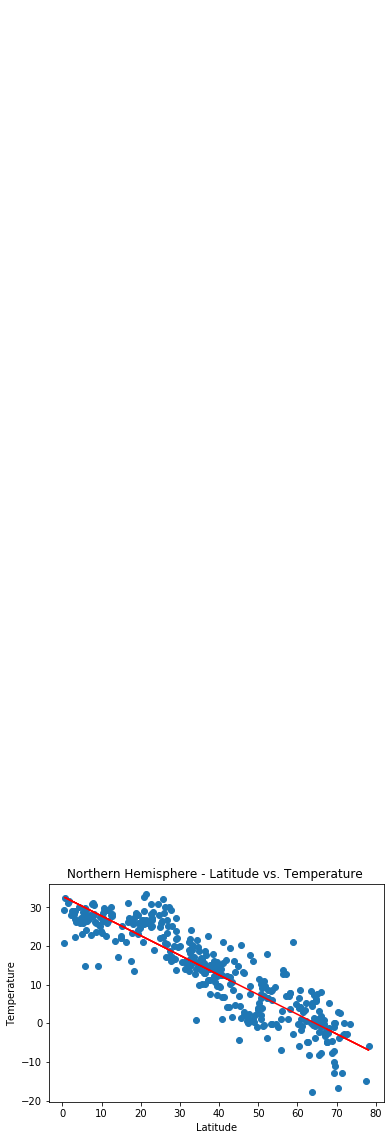

In [16]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = north_hem["Latitude"]
y_values = north_hem["Temperature"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere - Latitude vs. Temperature ")
plt.annotate(line_eq,(15,260),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

4      11.429035
6      20.913526
7      14.997694
10     17.656226
12     27.655658
         ...    
521    26.685653
524    19.997410
526    26.305435
527    26.347349
530    25.919229
Name: Latitude, Length: 169, dtype: float64
The r-squared is: 0.5045515019096322


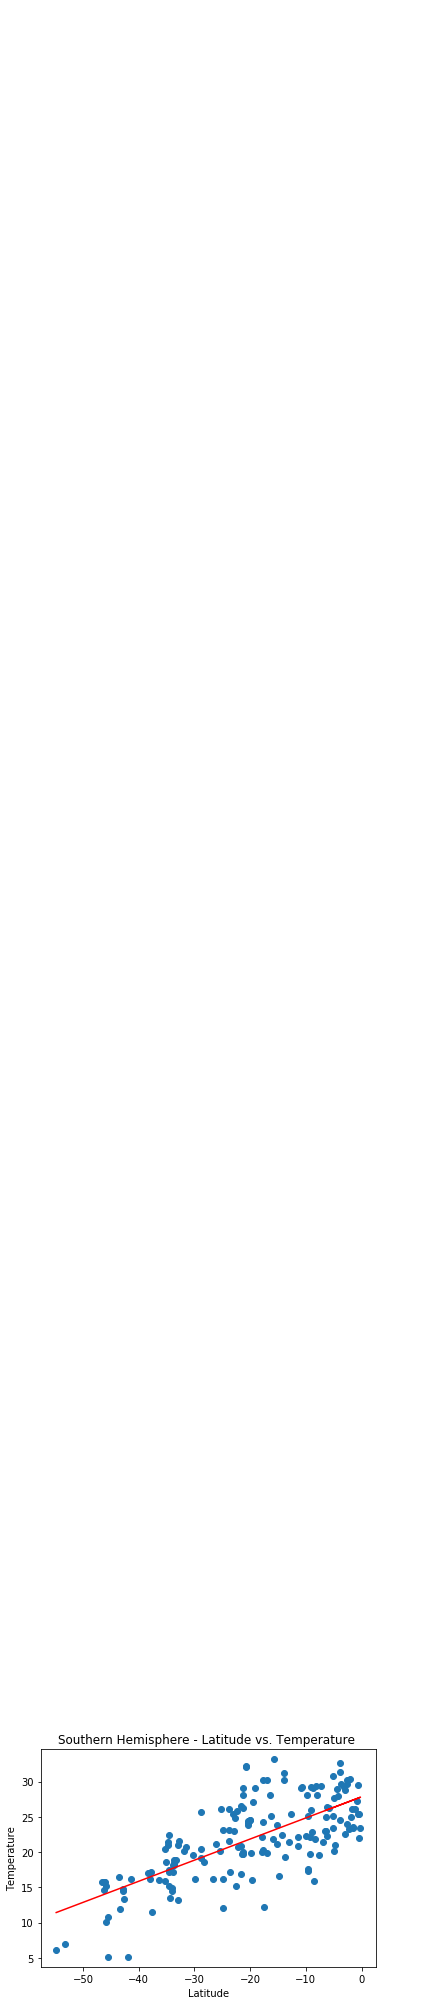

In [17]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = south_hem["Latitude"]
y_values = south_hem["Temperature"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere - Latitude vs. Temperature ")
plt.annotate(line_eq,(-10,280),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


In [ ]:
#Northern hemisphere graph shows that the temperature is hottest at the equator(point 0 latitude) and decreases as you move
#farther away. The southern hemisphere graph shows the opposit correlation with temperatures starting cold and increasing as 
#you move closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      68.872312
1      66.202311
2      68.819597
3      75.896551
5      67.369942
         ...    
532    62.517550
533    66.344640
534    67.557079
535    70.704149
536    75.393125
Name: Latitude, Length: 368, dtype: float64
The r-squared is: 0.056400310762133525


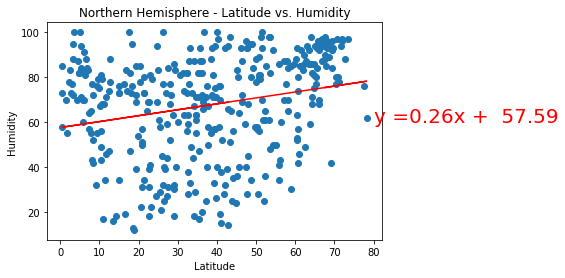

In [24]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = north_hem["Latitude"]
y_values = north_hem["Humidity"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.annotate(line_eq,(80,60),fontsize=20,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()



In [ ]:
#

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

4      63.608824
6      70.817161
7      66.321052
10     68.341570
12     75.941268
         ...    
521    75.204052
524    70.120901
526    74.915082
527    74.946937
530    74.621560
Name: Latitude, Length: 169, dtype: float64
The r-squared is: 0.034754171345212616


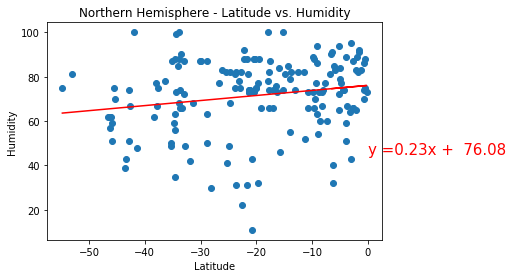

In [19]:
x_values = south_hem["Latitude"]
y_values = south_hem["Humidity"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.annotate(line_eq,(0,45),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

In [25]:
#There is no correlation between latitude and humidy in the norther hemisphere. 
#There may be a slight correlation between humidity and latitude in the southern hemisphere, getting more humid as you
#get closer to the equator. If there is a slight correlation, I don't think it would be statistically significant. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      56.548637
1      54.061157
2      56.499526
3      63.092700
5      55.148969
         ...    
532    50.628287
533    54.193757
534    55.323314
535    58.255250
536    62.623688
Name: Latitude, Length: 368, dtype: float64
The r-squared is: 0.016227300634100064


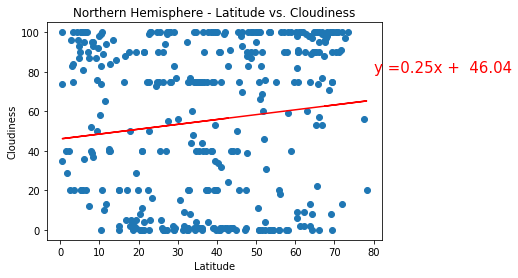

In [26]:
x_values = north_hem["Latitude"]
y_values = north_hem["Cloudiness"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.annotate(line_eq,(80,80),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

4      47.391576
6      50.745203
7      48.653420
10     49.593452
12     53.129158
         ...    
521    52.786174
524    50.421273
526    52.651732
527    52.666553
530    52.515174
Name: Latitude, Length: 169, dtype: float64
The r-squared is: 0.0015536486572534777


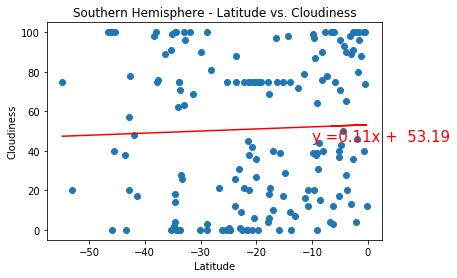

In [21]:
x_values = south_hem["Latitude"]
y_values = south_hem["Cloudiness"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.annotate(line_eq,(-10,45),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

In [ ]:
#The graphs don't show any correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      3.847664
1      3.562422
2      3.842032
3      4.598078
5      3.687163
         ...   
532    3.168772
533    3.577628
534    3.707155
535    4.043363
536    4.544296
Name: Latitude, Length: 368, dtype: float64
The r-squared is: 0.04944737633483736


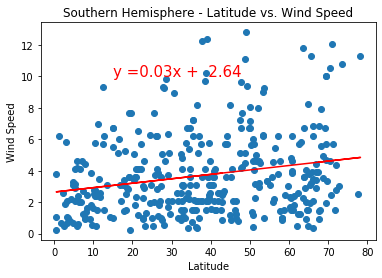

In [22]:
x_values = north_hem["Latitude"]
y_values = north_hem["Wind Speed"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

4      5.254042
6      3.383534
7      4.550239
10     4.025930
12     2.053867
         ...   
521    2.245169
524    3.564208
526    2.320154
527    2.311888
530    2.396321
Name: Latitude, Length: 169, dtype: float64
The r-squared is: 0.1075646045654432


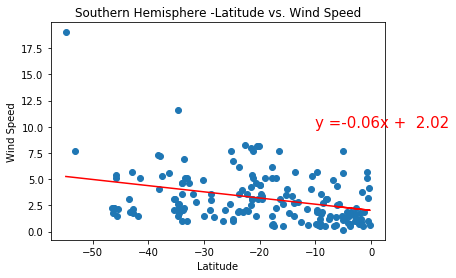

In [23]:
x_values = south_hem["Latitude"]
y_values = south_hem["Wind Speed"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere -Latitude vs. Wind Speed")
plt.annotate(line_eq,(-10,10),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

In [ ]:
#Windspeed looks to be relatively consistent regardless of latitude in both of these graphs.

In [ ]:
#Observable trends:
#1) We can statistically show that temperatures are hotter as you near the equator.
#2)There's not a good way to predict cloudiness as our graphs shoed no correlation. 
#3) There is also no correlation between wind a latitude. 